In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import matplotlib.pyplot as plt

import numpy as np
from utils import Lmatrix2paths, adapted_empirical_measure, adapted_wasserstein_squared, quantization, nested
from tqdm import tqdm

In [2]:
# Markovian
normalize = False

L = np.array([[1, 0, 0], [1, 2, 0], [2, 4, 2]])
M = np.array([[1, 0, 0], [2, 1, 0], [2, 1, 2]])

n, n_trial = 5, 10
AW_2squares = np.zeros([n,n_trial])

n_sample_base = 100
n_sample_list = 2**np.arange(n)*n_sample_base

for i, n_sample in enumerate(n_sample_list):
    print(f'Number of sample: {n_sample}')
    tqdm_bar = tqdm(np.arange(n_trial))
    for j in tqdm_bar:
        X,A = Lmatrix2paths(L, n_sample, seed = j, verbose = False)
        Y,B = Lmatrix2paths(M, n_sample, seed = j, verbose = False)
        delta_n = 1/np.sqrt(n_sample)
        adaptedX = adapted_empirical_measure(X, delta_n = delta_n)
        adaptedY = adapted_empirical_measure(Y, delta_n = delta_n)
        q2v, v2q, mu_x, nu_y, q2v_x, v2q_x, q2v_y, v2q_y = quantization(adaptedX, adaptedY, markovian=True, verbose = False)
        AW_2square, V = nested(mu_x, nu_y, v2q_x, v2q_y, q2v, markovian=True, verbose=False)
        AW_2squares[i,j] = AW_2square

Number of sample: 100


100%|██████████| 10/10 [00:03<00:00,  2.87it/s]


Number of sample: 200


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


Number of sample: 400


100%|██████████| 10/10 [00:25<00:00,  2.54s/it]


Number of sample: 800


100%|██████████| 10/10 [00:58<00:00,  5.88s/it]


Number of sample: 1600


100%|██████████| 10/10 [02:24<00:00, 14.49s/it]


Theoretical AW_2^2:  11.0


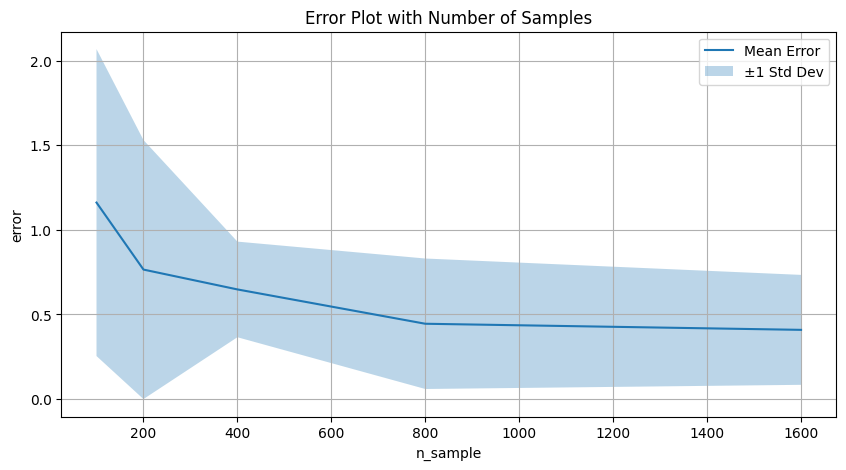

In [ ]:
dist_bench = adapted_wasserstein_squared(A, B)
print("Theoretical AW_2^2: ", dist_bench)

errors = np.abs(AW_2squares - dist_bench)

mean_error = np.mean(errors, axis=1)
std_error = np.std(errors, axis=1)

# Plot mean error with shaded standard deviation
plt.figure(figsize=(10, 5))
plt.plot(n_sample_list, mean_error, label="Mean Error")
plt.fill_between(n_sample_list, mean_error - std_error, mean_error + std_error, alpha=0.3, label="±1 Std Dev")

# Labels and title
plt.xlabel("n_sample")
plt.ylabel("error")
plt.title("Error Plot with Number of Samples")
plt.legend()
plt.grid(True)

plt.savefig('stat_markovian.png')
with open('stat_markovian.npy', 'wb') as f:
    np.save(f, errors)